In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [94]:
df = pd.read_csv('all_data_no_duplicates_equal_size.csv', index_col=0)

In [95]:
df.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
song_id,,,,,,,,,,,,,,,,,,,,,
17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,9.052435,...,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608,blues
80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,9.118914,...,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646,blues
fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,13.601735,...,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551,blues
8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,0.926584,...,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730,blues
6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,11.714938,...,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227,blues


## Train Test Split

Split data first to avoid data leakage.

In [96]:
X = df.drop(['genre'], axis=1)
y = df['genre']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

In [97]:
# here use entire set as train
X_train = X
y_train = y

## Add Encoded Label

In [98]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [99]:
y_train = le.transform(y_train)

In [18]:
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'blues': 0,
 'classical': 1,
 'disco': 2,
 'electronic': 3,
 'hiphop': 4,
 'jazz': 5,
 'pop': 6,
 'rock': 7}

## Normalize Data

In [100]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [101]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.87464603, 0.5328989 , 0.21407806, ..., 0.06575662, 0.85781975,
        0.9443782 ],
       [0.74055406, 0.57074838, 0.17765418, ..., 0.03399157, 0.84539351,
        0.91875167],
       [0.92773046, 0.41687256, 0.23031843, ..., 0.03657414, 0.86175088,
        0.94640076],
       ...,
       [0.77892816, 0.60318433, 0.30417404, ..., 0.02159987, 0.83580919,
        0.92895419],
       [0.8996922 , 0.43889411, 0.18177288, ..., 0.08384796, 0.83289193,
        0.91895397],
       [0.86334978, 0.57819952, 0.1034806 , ..., 0.03330459, 0.88206079,
        0.97627162]])

In [102]:
X_train_scaled.shape

(880, 79)

## PCA - Dimension Reduction

In [103]:
pca = PCA(n_components=45) 
pca.fit(X_train_scaled)

PCA(n_components=45)

In [104]:
X_train_PC = pca.transform(X_train_scaled)

In [ ]:
principalDf = pd.DataFrame(data = X_train_PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'])

<BarContainer object of 20 artists>

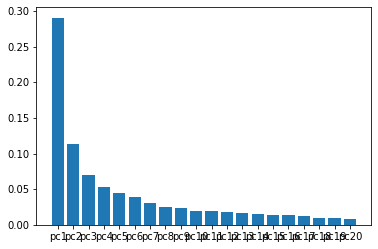

In [ ]:
plt.bar(principalDf.columns, pca.explained_variance_ratio_)

In [108]:
sum(pca.explained_variance_ratio_[0:20])

0.8488799694044091

First 20 PCs account for 85% of variance.

[0.29528477 0.11029769 0.06775153 0.04991165 0.04716787 0.04027493
 0.03199581 0.02551496 0.02385095 0.01976227 0.01891393 0.01807129
 0.01614931 0.0148911  0.01451778 0.01279816 0.01263029 0.01040851
 0.00946213 0.00922193 0.0079614  0.00728757 0.00677541 0.00640758
 0.00615092]


(0.0, 1.0)

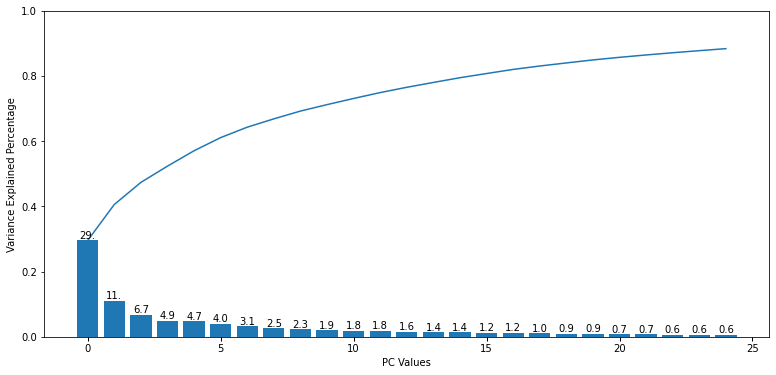

In [24]:
values = pca.explained_variance_ratio_
print(values)
cumulative = np.cumsum(values)
num_components = len(pca.explained_variance_ratio_)
index = np.arange(num_components)
plt.figure(figsize=(13, 6))
ax = plt.subplot()
ax.bar(index, values)
ax.plot(index, cumulative)
for val in range(num_components):
    ax.annotate(r"%s" % ((str(values[val]*100)[:3])), (index[val], values[val]), va='bottom', ha='center', fontsize=10)

ax.xaxis.set_tick_params(width=1)
ax.set_xlabel("PC Values")
ax.set_ylabel("Variance Explained Percentage")
ax.set_ylim(0.0, 1.0)

In [ ]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,-0.017265,0.073234,0.235377,0.337749,0.135215,-0.086868,-0.060813,-0.358011,-0.122222,-0.031851,0.256419,-0.160611,0.237439,0.064150,0.025688,0.091687,0.200422,0.069996,-0.080852,-0.047874
1,-0.853209,0.503111,-1.062490,-0.110684,-0.017320,0.085556,0.062170,0.226887,-0.757687,0.059402,0.349050,0.312957,0.249376,-0.063698,0.462835,0.026910,-0.001260,0.119013,0.080876,-0.026870
2,-1.071746,0.398660,0.152160,0.352234,0.249046,0.002136,-0.384168,-0.111964,-0.299837,-0.075396,0.484868,0.071944,-0.273654,-0.246856,0.000131,0.183524,0.201369,-0.124491,-0.194539,0.165366
3,0.786546,0.958698,0.661863,0.389578,-0.022706,0.311263,-0.098285,-0.233877,0.320179,0.524404,0.822117,-0.295958,-0.323898,0.455746,-0.257764,-0.283412,-0.334054,0.542190,0.077737,0.255383
4,1.448522,0.144797,0.347733,0.345239,-0.648342,0.134010,-0.141336,0.000797,-0.037194,0.003057,0.153738,0.172331,-0.060906,-0.041539,-0.143826,0.001682,-0.315917,0.041007,0.236456,0.010674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,1.060972,0.573800,-0.186293,0.144335,-0.444949,-0.027421,0.116629,-0.019835,0.116912,0.099532,0.034413,-0.127456,-0.121062,0.344699,-0.055545,0.102520,0.249096,0.040162,-0.175825,0.107176
585,0.012840,0.758578,-0.205940,0.349578,-0.061085,-0.052710,0.243504,-0.235777,-0.454224,0.163742,0.515762,0.180970,0.138461,0.121333,0.198342,0.199944,0.073003,0.139730,0.093063,0.194648
586,-0.165722,-0.559592,0.209028,-0.056490,-0.160154,0.625406,0.352775,0.063443,0.005145,0.002743,0.138581,0.004063,0.097595,-0.032401,0.010780,-0.014301,0.123704,0.089906,-0.016581,0.045857
587,-0.696943,-0.300263,-0.671960,0.755937,0.444194,-0.324678,-0.115460,0.139828,-0.163779,0.351722,-0.380869,0.087282,-0.055369,0.260587,-0.129321,0.015889,-0.124039,-0.125556,0.158558,-0.132934


## KNN

In [ ]:
# defining parameter range
k_range = list(range(1, 31))
leaf_size = list(range(1, 51))
p=[1,2]
param_grid = dict(n_neighbors=k_range, leaf_size=leaf_size, p=p)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', refit=True, return_train_score=False,verbose=1)
grid_knn.fit(X_train_PC, y_train)

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)
print(grid_knn.best_score_) # accuracy for train

{'leaf_size': 1, 'n_neighbors': 11, 'p': 2}
KNeighborsClassifier(leaf_size=1, n_neighbors=11)
0.6026008182349503


In [ ]:
y_test = le.transform(y_test)
X_test_scaled = scaler.transform(X_test)
X_test_PC = pca.transform(X_test_scaled)

In [ ]:
test_preds_knn = grid_knn.predict(X_test_PC)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(test_preds_knn)))

              precision    recall  f1-score   support

       blues       0.44      0.54      0.49        37
   classical       0.95      0.97      0.96        36
       disco       0.41      0.81      0.55        36
  electronic       0.74      0.39      0.51        36
      hiphop       0.79      0.41      0.54        37
        jazz       0.90      0.70      0.79        37
         pop       0.36      0.36      0.36        36
        rock       0.72      0.72      0.72        36

    accuracy                           0.61       291
   macro avg       0.66      0.61      0.61       291
weighted avg       0.66      0.61      0.61       291



In [ ]:
class_names = le.classes_
cnf_matrix = confusion_matrix(y_test, test_preds_knn)

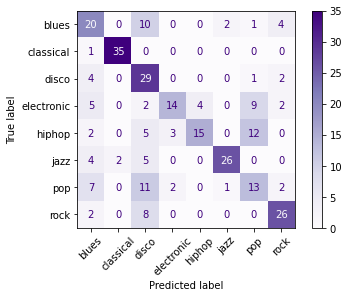

In [ ]:
plot_confusion_matrix(grid_knn, X_test_PC, y_test, xticks_rotation=45,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples)

In [ ]:
accuracy_score(y_test, test_preds_knn) # for KNN

0.6116838487972509

## SVM

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=10, refit = True, verbose = 1)
grid_svm.fit(X_train_PC, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)
print(grid_svm.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
0.6655756867329048


In [ ]:
test_preds_svm = grid_svm.predict(X_test_PC)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(test_preds_svm)))

              precision    recall  f1-score   support

       blues       0.50      0.54      0.52        37
   classical       0.97      1.00      0.99        36
       disco       0.65      0.83      0.73        36
  electronic       0.53      0.50      0.51        36
      hiphop       0.73      0.59      0.66        37
        jazz       0.90      0.76      0.82        37
         pop       0.47      0.42      0.44        36
        rock       0.71      0.81      0.75        36

    accuracy                           0.68       291
   macro avg       0.68      0.68      0.68       291
weighted avg       0.68      0.68      0.68       291



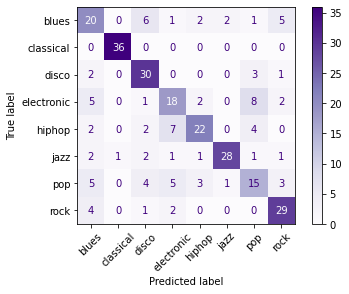

In [ ]:
class_names = le.classes_
cnf_matrix = confusion_matrix(y_test, test_preds_svm)
plot_confusion_matrix(grid_svm, X_test_PC, y_test, xticks_rotation=45,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples)

In [ ]:
accuracy_score(y_test, test_preds_svm) # for SVM

0.6804123711340206

## Setting up pipelines to find better params

In [13]:
knn = KNeighborsClassifier()

In [14]:
scaler = MinMaxScaler()

In [15]:
pca = PCA()

In [16]:
pipeKNN = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("knn", knn)])

param_grid_knn = {
    "pca__n_components": [20, 25, 30],
    "knn__n_neighbors": list(range(10, 21)),
    "knn__leaf_size": list(range(10, 31)),
    "knn__p": [1, 2],
}

In [17]:
search_knn = GridSearchCV(pipeKNN, param_grid_knn, cv=10, scoring='accuracy', verbose=1, return_train_score=True)
search_knn.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_knn.best_score_)
print(search_knn.best_params_)
print(search_knn.best_score_)

Fitting 10 folds for each of 1386 candidates, totalling 13860 fits
Best parameter (CV score=0.632):
{'knn__leaf_size': 28, 'knn__n_neighbors': 20, 'knn__p': 2, 'pca__n_components': 25}
0.6318181818181818


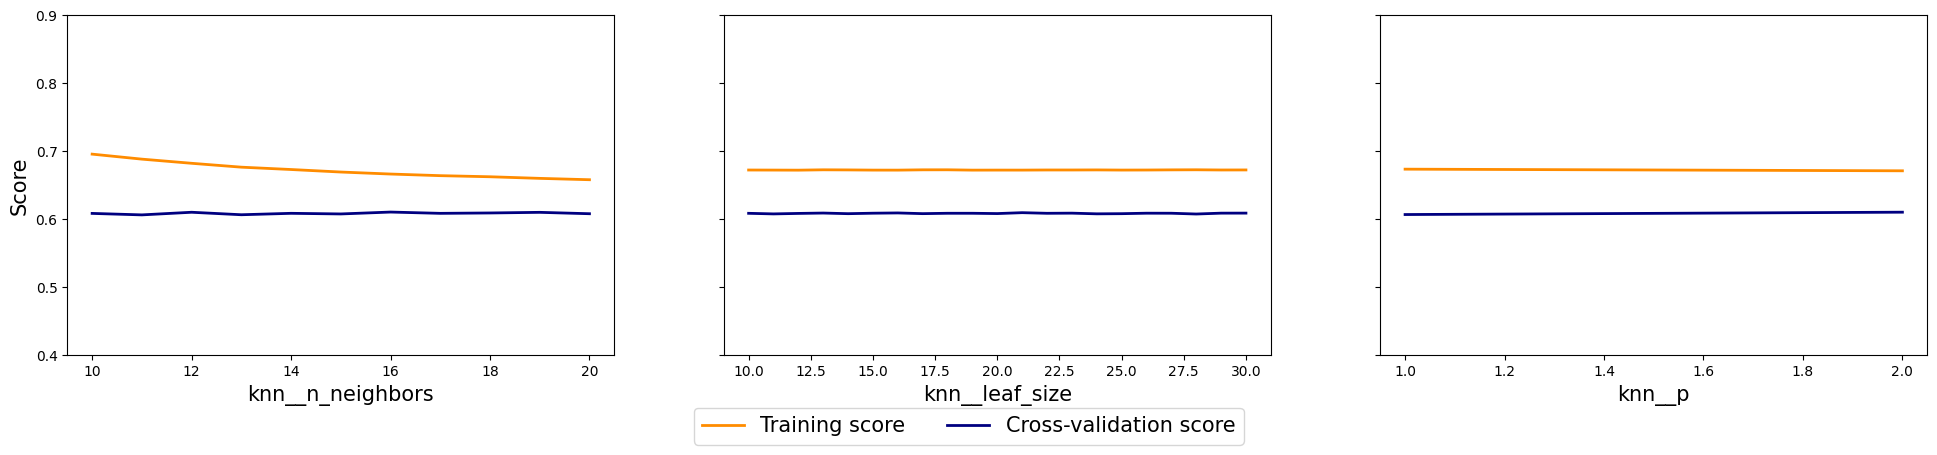

In [43]:
param_grid_knn = {
    "knn__n_neighbors": list(range(10, 21)),
    "knn__leaf_size": list(range(10, 31)),
    "knn__p": [1, 2],
}
df = pd.DataFrame(search_knn.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

# https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
def pooled_var(stds):
    n = 10
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))


fig, axes = plt.subplots(1, len(param_grid_knn), 
                         figsize = (8*len(param_grid_knn), 5),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=15)
lw = 2

for idx, (param_name, param_range) in enumerate(param_grid_knn.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=15)
    axes[idx].set_ylim(0.4, 0.9)
    axes[idx].plot(param_range, 
                grouped_df['mean_train_score'],
                label="Training score",
                color="darkorange",
                lw=lw)
    # axes[idx].fill_between(param_range,
    #             grouped_df['mean_train_score'] - grouped_df['std_train_score'],
    #             grouped_df['mean_train_score'] + grouped_df['std_train_score'],
    #             alpha=0.2,
    #             color="darkorange",
    #             lw=lw)
    axes[idx].plot(param_range,
                grouped_df['mean_test_score'],
                label="Cross-validation score",
                color="navy",
                lw=lw)
    # axes[idx].fill_between(param_range,
    #                 grouped_df['mean_test_score'] - grouped_df['std_test_score'],
    #                 grouped_df['mean_test_score'] + grouped_df['std_test_score'],
    #                 alpha=0.2,
    #                 color="navy",
    #                 lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=8, ncol=2, fontsize=15)

fig.subplots_adjust(bottom=0.2)  
plt.show()

In [ ]:
y_preds_pipeknn = search_knn.predict(X_test)
print("Testing accuracy:", accuracy_score(y_test, y_preds_pipeknn))

Testing accuracy: 0.6185567010309279


In [19]:
svm = SVC()

In [30]:
pipeSVM = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("svm", svm)])

param_grid_svm = {
    "pca__n_components": [30, 35, 40, 45, 50],
    "svm__C": [0.1, 1, 10, 100], 
    "svm__gamma": [1, 0.1, 0.01, 0.001],
    "svm__kernel": ['rbf', 'poly', 'sigmoid', 'linear']
}

search_svm = GridSearchCV(pipeSVM, param_grid_svm, cv=10, scoring='accuracy', verbose=1, return_train_score=True)
search_svm.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_svm.best_score_)
print(search_svm.best_params_)
print(search_svm.best_score_)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
Best parameter (CV score=0.743):
{'pca__n_components': 40, 'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
0.7431818181818182


In [ ]:
svm_preds_pipe = search_svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test, svm_preds_pipe))

0.8865979381443299


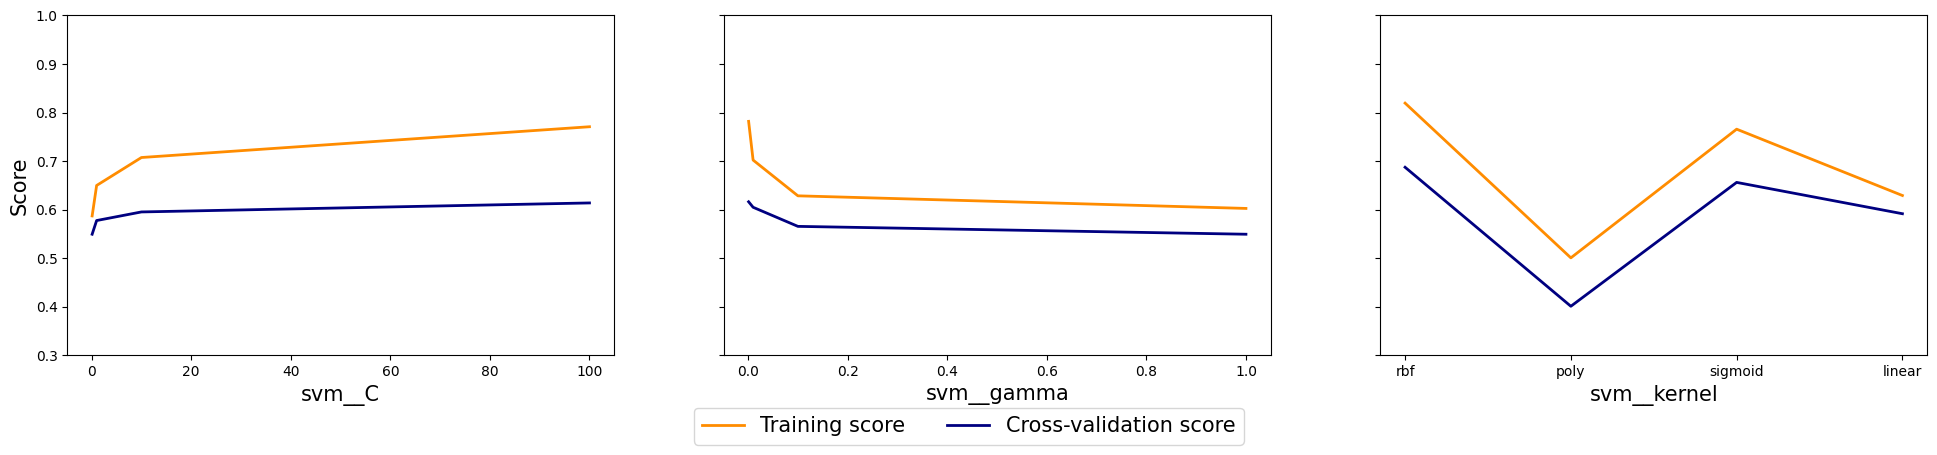

In [45]:
param_grid_svm = {
    "svm__C": [0.1, 1, 10, 100], 
    "svm__gamma": [1, 0.1, 0.01, 0.001],
    "svm__kernel": ['rbf', 'poly', 'sigmoid', 'linear']
}

df = pd.DataFrame(search_svm.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

# https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
def pooled_var(stds):
    n = 10
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))


fig, axes = plt.subplots(1, 3, 
                         figsize = (8*3, 5),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=15)
lw = 2



for idx, (param_name, param_range) in enumerate(param_grid_svm.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=15)
    axes[idx].set_ylim(0.3, 1.0)
    axes[idx].plot(param_range, 
                grouped_df['mean_train_score'],
                label="Training score",
                color="darkorange",
                lw=lw)
    # axes[idx].fill_between(param_range,
    #             grouped_df['mean_train_score'] - grouped_df['std_train_score'],
    #             grouped_df['mean_train_score'] + grouped_df['std_train_score'],
    #             alpha=0.2,
    #             color="darkorange",
    #             lw=lw)
    axes[idx].plot(param_range,
                grouped_df['mean_test_score'],
                label="Cross-validation score",
                color="navy",
                lw=lw)
    # axes[idx].fill_between(param_range,
    #                 grouped_df['mean_test_score'] - grouped_df['std_test_score'],
    #                 grouped_df['mean_test_score'] + grouped_df['std_test_score'],
    #                 alpha=0.2,
    #                 color="navy",
    #                 lw=lw)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc=8, ncol=2, fontsize=15)

fig.subplots_adjust(bottom=0.2)  
plt.show()